In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/BirdCLEF/train_metadata.csv")
df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


Explore bird species distribution maps
- It would be useful to create a density map of the recordings to show which bird species are located. The point data can be smoothed into a heat map

- explore fetching external datasets from places like eBird, birdNET, or Xeno-Canto. The distribution maps can act as important priors for classification tasks.

From the [Kaggle data page](https://www.kaggle.com/competitions/birdclef-2022/

1.   List item
2.   List item

data), here are some details about the columns of `df`:

- primary_label - a code for the bird species. You can review detailed information about the bird codes by appending the code to https://ebird.org/species/, such as https://ebird.org/species/amecro for the American Crow.
- secondary_labels: Background species as annotated by the recordist. An empty list does not mean that no background birds are audible.
- author - the eBird user who provided the recording.
- filename: the associated audio file.
- rating: Float value between 0.0 and 5.0 as an indicator of the quality rating on Xeno-canto and the number of background species, where 5.0 is the highest and 1.0 is the lowest. 0.0 means that this recording has no user rating yet.

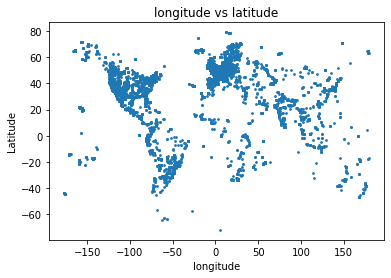

In [38]:
def plot_lonlat(df: pd.DataFrame, **kwargs):
  """Plot longitude vs latitude."""
  x=df['longitude']
  y=df['latitude']
  plt.scatter(x,y,s=3,**kwargs)
  plt.title("longitude vs latitude")
  plt.xlabel("longitude")
  plt.ylabel("Latitude")
  plt.show()

plot_lonlat(df)

In [31]:
df.loc[(df['secondary_labels'].str.len() !=2),:].head()
#find the potential neighbor bird species

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
18,akekee,"['apapan', 'warwhe1']","['call', 'male']",22.1467,-159.6134,Loxops caeruleirostris,Akekee,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,4.5,09:00,https://www.xeno-canto.org/210201,akekee/XC210201.ogg
19,akekee,['apapan'],"['call', 'male', 'song']",22.0815,-159.5550,Loxops caeruleirostris,Akekee,Patrick Blake,Creative Commons Attribution-NonCommercial-Sha...,3.5,14:00,https://www.xeno-canto.org/219961,akekee/XC219961.ogg
20,akekee,['iiwi'],['call'],22.1467,-159.6134,Loxops caeruleirostris,Akekee,Daniel Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,12:30,https://www.xeno-canto.org/27306,akekee/XC27306.ogg
22,akepa1,"['akiapo', 'apapan', 'hawama', 'hawcre', 'iiwi']",['call'],19.6292,-155.3597,Loxops coccineus,Hawaii Akepa,Brooks Rownd,Creative Commons Attribution-NonCommercial-Sha...,2.5,14:14,https://www.xeno-canto.org/122473,akepa1/XC122473.ogg


In [45]:
pip install kneebow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


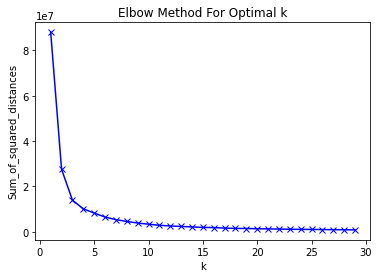

In [52]:
#find the optimal number of clusters
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[['longitude','latitude']])
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
from kneebow.rotor import Rotor
data = np.array(df[['longitude','latitude']])
rotor = Rotor()
rotor.fit_rotate(data)
elbow_index = rotor.get_elbow_index()

elbow_index

13529

In the plot above, we can find that k= 15 seems like a good optimal k to use for clustering in this dataset

In [39]:
#Kmeans Method
def plot_lonlat_labeled(df: pd.DataFrame, cluster_labels: np.array):
  #Plot longitude vs latitude, with species cluster labels.
  assert len(cluster_labels) == df.shape[0], "cluster labels wrong length"
  plot_lonlat(df, c= cluster_labels, cmap='viridis')#c: array-list, list of colors; cmap: color map
  plt.show()

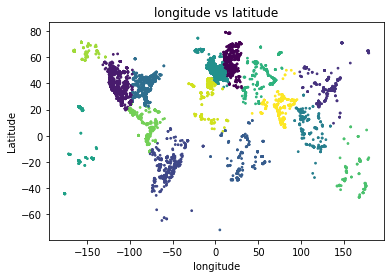

In [53]:
from sklearn.cluster import KMeans
kdf = df[['longitude','latitude']]
kmeans = KMeans(n_clusters=15, random_state=0).fit(kdf)
cluster_labels = kmeans.labels_
plot_lonlat_labeled(kdf, cluster_labels)

In [57]:
#kernel density estimation with 1-d array shown as below
from sklearn.neighbors import KernelDensity
df_kd = df[['longitude','latitude']]
kde = KernelDensity(kernel='gaussian', bandwidth=2).fit(df_kd)
kde.score_samples(df_kd)

array([-11.28742845,  -7.26583587,  -9.51315424, ...,  -9.24663733,
        -9.31216246,  -9.31216246])

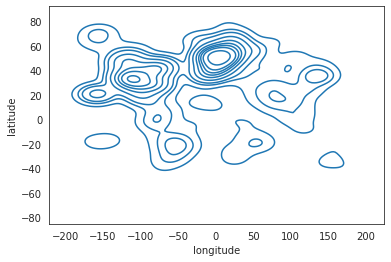

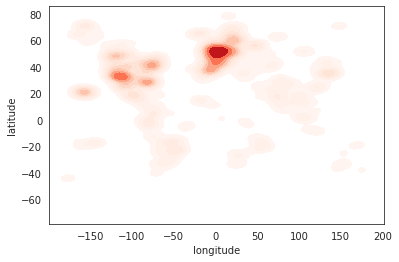

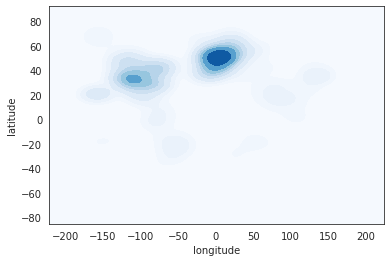

In [58]:
#contour plot using seaborn
import seaborn as sns
# set seaborn style
sns.set_style("white")
# Basic 2D density plot
sns.kdeplot(x=df_kd.longitude, y=df_kd.latitude)
plt.show()
# with shade
sns.kdeplot(x=df_kd.longitude, y=df_kd.latitude, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()
#With thresh parameter
sns.kdeplot(x=df_kd.longitude, y=df_kd.latitude, cmap="Blues", shade=True, thresh=0)
plt.show()